In [1]:
import pandas as pd

# Load the dataset
file_path = 'house_sales.csv'  # Adjust the path as needed
df = pd.read_csv(file_path)

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Calculate RFM metrics
rfm_df = df.groupby('zipcode').agg(
    recency=('date', lambda x: (df['date'].max() - x.max()).days),
    frequency=('id', 'count'),
    monetary=('price', 'sum')
).reset_index()

rfm_df


,zipcode,recency,frequency,monetary
0,98001,14,362,101651298.0
1,98002,15,199,46622523.0
2,98003,20,280,82351158.0
3,98004,15,317,429828885.0
4,98005,15,168,136107699.0
...,...,...,...,...
65,98177,19,255,172427275.0
66,98178,15,262,81380542.0
67,98188,13,136,39314655.0
68,98198,14,280,84806087.0


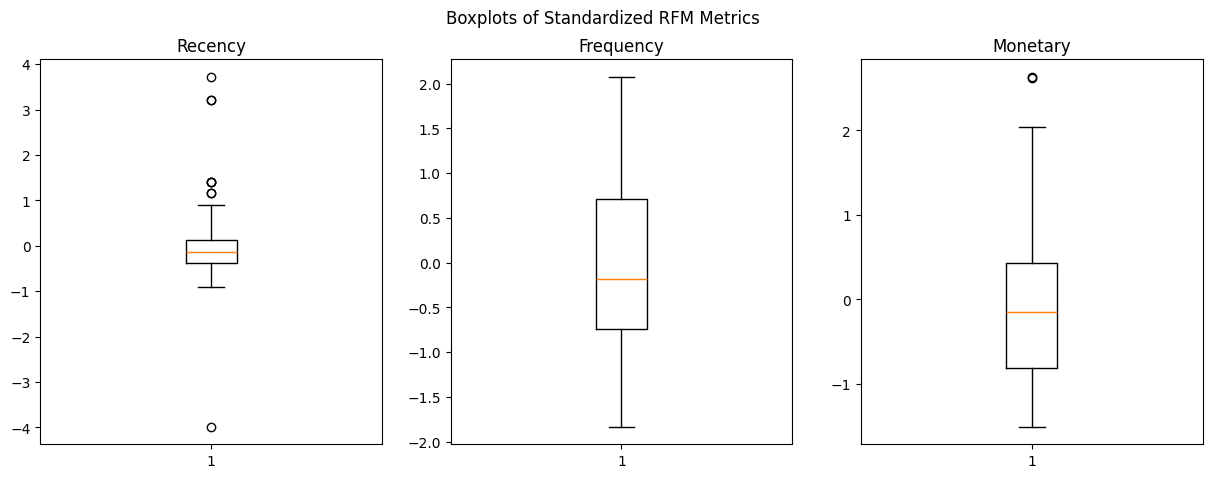

In [2]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Standardize the RFM metrics
scaler = StandardScaler()
rfm_standardized = pd.DataFrame(scaler.fit_transform(rfm_df[['recency', 'frequency', 'monetary']]), columns=['recency', 'frequency', 'monetary'])

# Verify the existence of outliers using boxplots
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.boxplot(rfm_standardized['recency'])
plt.title('Recency')

plt.subplot(1, 3, 2)
plt.boxplot(rfm_standardized['frequency'])
plt.title('Frequency')

plt.subplot(1, 3, 3)
plt.boxplot(rfm_standardized['monetary'])
plt.title('Monetary')

plt.suptitle('Boxplots of Standardized RFM Metrics')
plt.show()

# Handling outliers (example: capping the outliers)
def cap_outliers(series, threshold=3):
    return np.where(series > threshold, threshold, np.where(series < -threshold, -threshold, series))

rfm_standardized['recency'] = cap_outliers(rfm_standardized['recency'])
rfm_standardized['frequency'] = cap_outliers(rfm_standardized['frequency'])
rfm_standardized['monetary'] = cap_outliers(rfm_standardized['monetary'])

/home/ertay/tasksuni/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/ertay/tasksuni/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/ertay/tasksuni/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/ertay/tasksuni/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will c

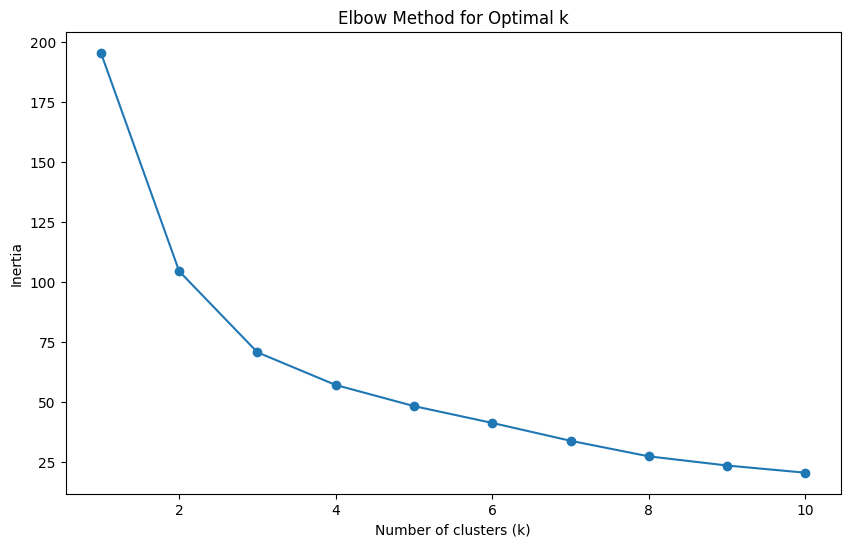

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow method to find the optimal k
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_standardized)
    inertia.append(kmeans.inertia_)

# Plot the elbow method results
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()
